# Attention !!!
- Please write or take a screenshot of all answers in the pdf file. You won't be graded if there is no pdf file in the submission.
- Only TODO 1, 2, 3, 4, 5, 6, 10, 11 will be graded.
- **Extra credit:** 1% of total grade for Com Eng Math 2 for TODO 7, 8, 9 (1/3 each.)

# Sampling

Sampling is a process that is very important for writing simulations. In this section, you will try to sample from some common distributions.

TODO#1: Write functions that samples from the following distribution
1. $\mathcal{N}(0,1)$
2. $Bernoulli(0.3)$
3. $B(10, 0.3)$
4. $Multinomial(n=10, p=[0.3,0.2,0.5])$
5. $U(0,1)$
<!-- 6. $T(0,1)$; $T(a,b)$ is defined as a function with a shape of a triangle that pass through point $(a,0)$, $(b,0)$, and $(b, K):\frac{(b-a)K}{2}=1$. -->
6. $T(0,1)$; $T(a,b)$ is defined as a function with a shape of a triangle that pass through point $(a,0)$, $(b,0)$, and $(\frac{a+b}{2}, K):\frac{(b-a)K}{2}=1$.

Capture screenshot of the histogram for each of the distribution and paste them on the pdf file. The example is shown below.

Hint: see scipy.stats for common distributions.
[plt.hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) should be helpful for plotting histograms

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, bernoulli, binom, multinomial, uniform, triang


def sample_normal(sample_size=10, mu=0, std=1):
  # TODO#1.1: Sample from normal distribution with given mean and std
  return norm.rvs(loc=mu, scale=std, size=sample_size)


def sample_bernoulli(sample_size=10, p=0.3):
  # TODO#1.2: Sample from Bernoulli distribution with given p
  return bernoulli.rvs(p, size=sample_size)


def sample_binomial(sample_size=10, n=10, p=0.3):
  # TODO#1.3: Sample from Binomial distribution with given n and p
  return binom.rvs(n, p, size=sample_size)


def sample_multinomial(sample_size=10, n=10, p=[0.3, 0.2, 0.5]):
  # TODO#1.4: Sample from Multinomial distribution with given n and p
  return multinomial.rvs(n, p, size=sample_size)


def sample_uniform(sample_size=10, from_x=0, to_x=1):
  # TODO#1.5: Sample from uniform distribution with given from_x and to_x
  return uniform.rvs(loc=from_x, scale=to_x-from_x, size=sample_size)


def sample_triangle(sample_size=10, a=0, b=1):
  # TODO#1.6: Sample from a triangle distribution with given a and b
  return triang.rvs(c=(a+b)/2, loc=a, scale=b-a, size=sample_size)

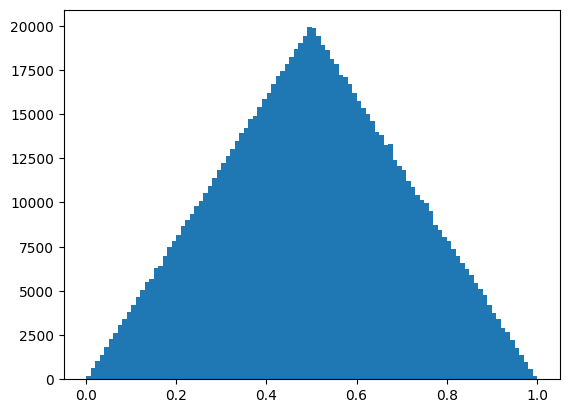

In [40]:
# Use this code block to show your sampling result.
sample_size = 1000000
s = sample_triangle(sample_size=sample_size)
count, bins, ignored = plt.hist(s, 100, density=False)
plt.show()

# Law of large number

### Law of large number

**TODO#2:** Using a sampling function from TODO#1.1, Plot the graph that shows the relation between an empirical mean and sampling size from 1 up to 10000.
What does the graph imply about the difference between the empirical mean and the theoritical mean?

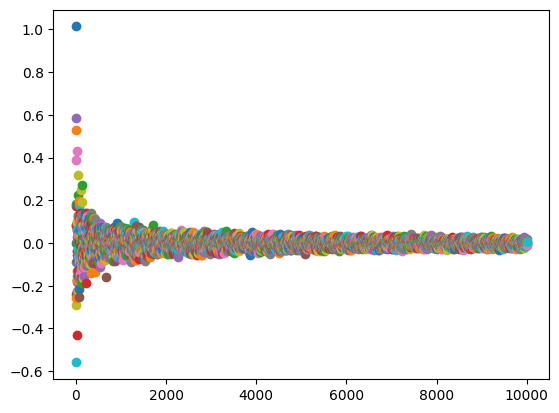

In [8]:
def find_Empirical_mean(sample_size=10, mu=0, std=1):
  return np.mean(sample_normal(sample_size, mu, std))

for i in range(1, 10001):
  plt.scatter(i, find_Empirical_mean(sample_size=i))

### Law of large number for histogram

The histogram is used to approximate the PDF of an unknown distribution.
The bin in the histogram represents the frequency of the event happening inside the bin range.

**TODO#3:** Given a fix bin number of 40. Plot the histogram of the data sampling from the function, `sample_normal(n, 0, 1)`, for different sizes of sample: 500, 1k, 5k and 10k.
Compare and explain the relation between the approximation given by the histogram and the true PDF for each of the sample size.

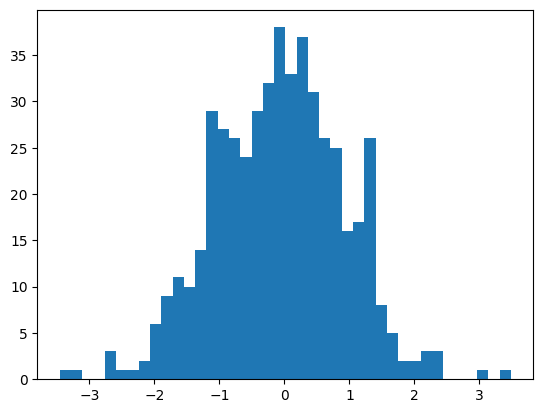

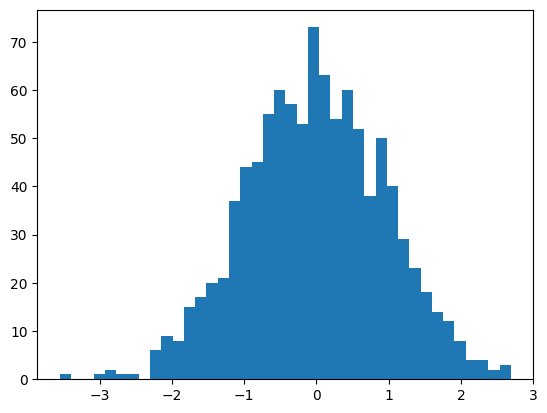

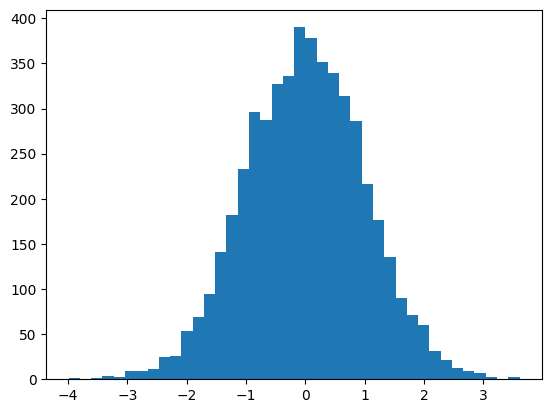

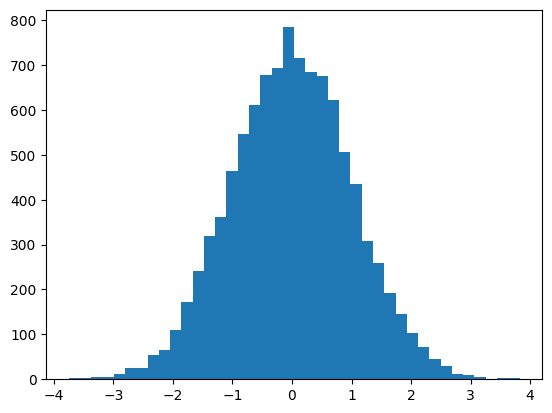

In [24]:
sample_size = 500
s = sample_normal(sample_size=sample_size)
count, bins, ignored = plt.hist(s, 40, density=False)
plt.show()

sample_size = 1000
s = sample_normal(sample_size=sample_size)
count, bins, ignored = plt.hist(s, 40, density=False)
plt.show()

sample_size = 5000
s = sample_normal(sample_size=sample_size)
count, bins, ignored = plt.hist(s, 40, density=False)
plt.show()

sample_size = 10000
s = sample_normal(sample_size=sample_size)
count, bins, ignored = plt.hist(s, 40, density=False)
plt.show()

## Central limit theorem

In this part we will use the Central Limit Theorem to approximate the true probabity of getting more than 40 heads when an unfair coin, with the probability 0.3 of being head, is tossed 100 times.


**TODO#4:** Simulate multiple coin tosses to construct a histrogram from the outcomes. Plot the histogram. Hint: x-axis should represents the number of heads when the coin is tossed 100 times. Does this histogram looks like a normal distribution?

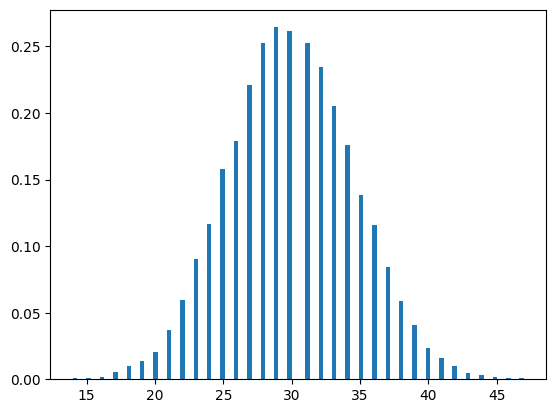

In [2]:
# Code here
sample_size = 10000
s = sample_binomial(sample_size=sample_size, n=100, p=0.3)
plt.hist(s, 101, density=True)
plt.show()

**TODO#5:** Use CLT to find the probability of getting more than 40 heads.

**TODO#6:** Compare and find the difference between CLT's approximation and the actual probability using the binomial distribution.

In [4]:
n = 100
p = 0.3
mu = n*p
std = np.sqrt(n*p*(1-p))

# calculate z-score
z = (40 - mu) / std

prob = 1 - norm.cdf(z)

print("Probability of getting more than 40 heads is: ", prob)

Probability of getting more than 40 heads is:  0.014548165870626129


In [5]:
# Compare with the result from binomial distribution

n = 100
p = 0.3
prob_binom = 1 - binom.cdf(40, n, p)

print("Probability of getting more than 40 heads is: ", prob_binom)
print("Difference: ", prob - prob_binom)

Probability of getting more than 40 heads is:  0.012498407166438241
Difference:  0.0020497587041878873


# Algebra of Random Variables

Given an independent random variable $X$ and $Y$, such that $X \sim F$ and $Y \sim U(3,5)$. The summation of those two is written as $Z = X + Y$ and the PDF of $F$ is defined below.
$$
F(X) =
\begin{cases}
0.1, & -2<=X<=0\\
0.4, & 0<X<=2 \\
\end{cases}
$$
**TODO#7:** Find $P( 3 < Z < 5 )$.

In [53]:
import warnings
warnings.filterwarnings('ignore')

from scipy.integrate import quad

precise = 0.001

# define the PDF of X
def f(x):
	if x <= 0:
		return 0.1
	elif x <= 2:
		return 0.4
	else:
		return 0

# define the PDF of Y
def g(y):
	if y < 3 or y > 5:
		return 0
	else:
		return 0.5

# define the PDF of Z
def h(z):
	# use integrate to calculate
	return quad(lambda x: f(x)*g(z-x), -2, 5)[0]

# calculate the probability
prob = quad(h, 3, 5)[0]
print("Probability of 3 < Z < 5 is: ", prob)

Probability of 3 < Z < 5 is:  0.49999592328729675


# Correlation

The correlation captures the linear relationshi between two sets of random variables. The higher magnitude of the correlation indicates a stronger relationship.


**TODO#8:** Find the correlation of $X$ and $Y = X + A$, given that $X \sim U(-1,1)$ and
1. $A = 10$
2. $A \sim U(-1,1)$
3. $A \sim U(-10,10)$
4. $A \sim U(-100,100)$


**TODO#9:** From the results in TODO#8, answer following questions
1. Does the correlation decrease as we increase the randomness of A ?
2. Explain the result when we change from $A \sim U(-10,10)$ to $A \sim U(9990,10010)$. Hint: Compare the result with $A$ and $A + 10000: A \sim U(-10,10) $

A=10		 1.0
A~U(-1,1)	 0.7066350679768639
A~U(-10,10)	 0.09573616266085563
A~U(-100,100)	 0.0066634916383896065


# Hamtaro and his cloud storage empire.



After the success in the manufacturing business. Hamtaro wants to expand his business into a new sector.
Since cloud computing is currently booming, he decides to enter into the cloud storage business.

The storage disk that Hamtaro uses can operate only in the temperature of $[0,30]$ degree Celcius. The disk has the prabability of a read failure $P(Fail|t) = \frac{0.97}{2250}(t-15)^2+0.001$ where $t$ is the operating temperature.
<!-- Hamtaro's disks has a special architecture that can be  simultaneously read by infinite requests at the same time. However, a failure of one request will cause all of its parallels to fail. -->

Since Hamtoro doesn't want any failures in his service, he decides to buy a super luxury air-conditioning system to control the temperature in his data warehouse. Even if the air conditioner is extremely expensive, the room temperature is still not stable. When Hamtaro tries to set the tempurature to $\mu$, the actual temperature is random and can be modeled by $t\sim U(\mu-1,\mu+1)$.

**TODO#10:** Answer the following questions.
1. What is the temperature that Hamtaro should set the air conditioner to? Justify your answer.
2. What is the probability of failure at the temperature used in part 1?
<!-- 3. If Hamtaro want to handle 10k concurrent requests, what is the minimum disks should Hamtoro has to make 99.99% of disk availability and how should he split the workloads? Hamtaro connects the all the disks in parallel. The read request will fail if all disks fail to be read at the same time. -->
3. What is the minimum number of disks that Hamtoro has to use to make sure that the probability of having more than 1 failure in 10k requests is less than 0.01\%? Hamtaro connects the all the disks in parallel. The read request will fail if all disks fail to at the same time.
4. **Extra** The temperature is now modeled by $t\sim \mathcal{N}(\mu,9)$ instead of $t\sim U(\mu-1,\mu+1)$. Repeat question 1-3.

**Hint:** `scipy.integrate.quad` can help you do integration.

The minimum of P_fail_mu is:  0.001143704548850501
The corresponding mu is:  15.001400140014
The minimum number of disks is:  2
The probability of having more than 1 failure in 10k requests is:  8.480033392543884e-05


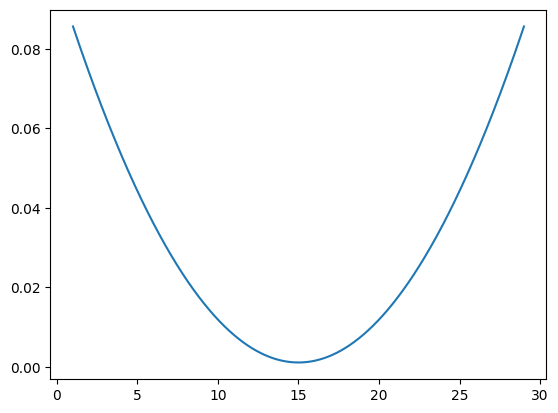

In [11]:
from scipy.integrate import quad
# The storage disk that Hamtaro uses can operate only in the temperature of $[0,30]$ degree Celcius. The disk has the prabability of a read failure $P(Fail|t) = \frac{0.97}{2250}(t-15)^2+0.001$ where $t$ is the operating temperature.
# <!-- Hamtaro's disks has a special architecture that can be  simultaneously read by infinite requests at the same time. However, a failure of one request will cause all of its parallels to fail. -->

# Since Hamtoro doesn't want any failures in his service, he decides to buy a super luxury air-conditioning system to control the temperature in his data warehouse. Even if the air conditioner is extremely expensive, the room temperature is still not stable. When Hamtaro tries to set the tempurature to $\mu$, the actual temperature is random and can be modeled by $t\sim U(\mu-1,\mu+1)$.

# Code here
def P_fail_given_mu(mu):
	def P_fail_given_t(t):
		return ((0.97/2250)*(t-15)**2 + 0.001) * (1/2)
	return quad(P_fail_given_t, mu-1, mu+1)[0]

# possible range of mu is [1, 29] degree Celcius
mu = np.linspace(1, 29, 10000)
P_fail_mu = [P_fail_given_mu(m) for m in mu]
plt.plot(mu, P_fail_mu)

# find the minimum of P_fail_mu
min_idx = np.argmin(P_fail_mu)
print("The minimum of P_fail_mu is: ", P_fail_mu[min_idx])
print("The corresponding mu is: ", mu[min_idx])

# What is the minimum number of disks that Hamtoro has to use to make sure that the probability of having more than 1 failure in 10k requests is less than 0.01\%? Hamtaro connects the all the disks in parallel. The read request will fail if all disks fail to at the same time.
# having 0 or 1 failure from 10K request must be greater than 99.99%

# code here
def P_success_given_n(fail_prob, n):
	return (1 - fail_prob)**n

def P_failure_given_n(fail_prob, n):
	return fail_prob**n

def choose(n,r):
	return np.math.factorial(n) / (np.math.factorial(r) * np.math.factorial(n-r))

def calculate_prob(n):
	return choose(10000, 0) * P_success_given_n(P_fail_mu[min_idx]**n, 10000) + choose(10000, 1) * P_failure_given_n(P_fail_mu[min_idx]**n, 1) * P_success_given_n(P_fail_mu[min_idx]**n, 9999)

n = 1
while calculate_prob(n) < 0.9999:
	n += 1

print("The minimum number of disks is: ", n)
print("The probability of having more than 1 failure in 10k requests is: ", 1-calculate_prob(n))

In [23]:
from scipy.integrate import quad
# TODO 10.4 change the distribution to normal distribution with mean = 15 and std = 9
# Code here
def P_fail_given_mu(mu):
	def P_fail_given_t(t):
		return ((0.97/2250)*(t-15)**2 + 0.001) * np.exp(-((t-15)**2)/(2*9)) / (3*np.sqrt(2*np.pi))
	return quad(P_fail_given_t, 0, 30)[0]

# possible range of mu is [0, 30] degree Celcius
# mu = np.linspace(0, 30, 10000)
mu = [15]
P_fail_mu = [P_fail_given_mu(m) for m in mu]

# find the minimum of P_fail_mu
min_idx = np.argmin(P_fail_mu)
print("The minimum of P_fail_mu is: ", P_fail_mu[min_idx])
print("The corresponding mu is: ", mu[min_idx])

# What is the minimum number of disks that Hamtoro has to use to make sure that the probability of having more than 1 failure in 10k requests is less than 0.01\%? Hamtaro connects the all the disks in parallel. The read request will fail if all disks fail to at the same time.
# having 0 or 1 failure from 10K request must be greater than 99.99%

# code here
def P_success_given_n(fail_prob, n):
	return (1 - fail_prob)**n

def P_failure_given_n(fail_prob, n):
	return fail_prob**n

def choose(n,r):
	return np.math.factorial(n) / (np.math.factorial(r) * np.math.factorial(n-r))

def calculate_prob(n):
	return choose(10000, 0) * P_success_given_n(P_fail_mu[min_idx]**n, 10000) + choose(10000, 1) * P_failure_given_n(P_fail_mu[min_idx]**n, 1) * P_success_given_n(P_fail_mu[min_idx]**n, 9999)

n = 1
while calculate_prob(n) < 0.9999:
	n += 1

print("The minimum number of disks is: ", n)
print("The probability of having more than 1 failure in 10k requests is: ", 1-calculate_prob(n))

The minimum of P_fail_mu is:  0.004879939517563487
The corresponding mu is:  15
The minimum number of disks is:  3
The probability of having more than 1 failure in 10k requests is:  6.746473749652537e-07


# Moontaro
![picture](https://i.redd.it/mcveltqx2j071.png)

Recently, cryptocurrency investment has become extremely popular due to its extraordinarily high rates of return. Though many people consider it a risky investment, Hamtaro does not want to miss this opportunity and start gathering information about these coins. His research suggests that four coins, namely $a$, $b$, $c$, and $d$, have a promising future to go to the moon.


Hamtaro wants to run simulations to validate his chances. As the value of the coins is non-deterministic, he models it sequentially based on their historical values (a.k.a. autoregressive model). The price of coin $i$ at day $t$ is formulated as

$p_{i,t} = p_{i,t-1} \times r_{i,t}$, where $i \in \{a, b, c, d\}$, and  $p_{i, 0} = 10$.

The rates $r_{i,t}$, are drawn from a multivariant guassian distribution $\mathcal{N}(\mathbf{\mu}, \mathbf{\Sigma})$, where $\mu = [1.003, 1.002, 1.004, 1.004]^T$ and $\mathbf{\Sigma}$ as given below:

$\mathbf{\Sigma}$ | a | b | c | d
--- | --- | --- | --- |---
a |  10 x 10$^{-3}$ | 0 | 4 x 10$^{-3}$ | 5 x 10$^{-3}$
b |  0  | 3 x 10$^{-3}$ | 0 | 0
c |  4 x 10$^{-3}$  | 0 | 12 x 10$^{-3}$| 2 x 10$^{-3}$
d |  5 x 10$^{-3}$  | 0 | 2 x 10$^{-3}$ | 15 x 10$^{-3}$


<!-- 1. Are $p_{a,t}$ and $p_{b,t}$ independent ? Why ?
2. Are $p_{a,t}$ and $p_{c,t}$ independent ? Why ?
3. Are $p_{a,t}$ and $p_{d,t}$ independent ? Why ? -->

**TODO11:**
1. Which pairs of coins are independent? Why?
2. Given the following definitions:
  - <b>Return</b> :  a coin price at day $T$ minus the price at day 0, i.e., the return of coin $i$ at day $T = p_{i,T} - p_{i, 0}$.
  - <b>Expected return</b> : the average return from 10000 distinct simulated end prices.
  
  Simulate the expected return for each coin if Hamtaro wants to sell his coins 30 and 180 days after buying $(T \in \{30, 180\})$.
  hint: you should write reusable functions to make your life easier.
3. Which coin has the highest probability of having profit (end price is higher than start price)? Compare the variance of the return with other coins.
4. How can the expected return be positive while having around 50\% chance of profitability?

After simulating the price of individual coins, Hamtaro now proposes seven investment strategies (portfolio) to maximize the profit. The detail of each strategy is shown in the table below.  

Strategy | Buy $a$ | Buy $b$ | Buy $c$ | Buy $d$ | Expected\[return\] | Variance\[return\] | Probability of having profit
---| --- |--- |--- | ---| --- | --- | ---
1  | 100% | 0%   | 0%  |    0%|  |  |
2  | 0%   | 100% | 0%  |    0%|  |  |
3  | 0%   | 0%   | 100%|    0%|  |  |
4  | 0%   | 0%   |   0%|  100%|  |  |
5  | 50%  | 50%  | 0%  |    0%|  |  |
6  | 50%  | 0%   | 50% |    0%|  |  |
7  | 50%  | 0%   |  0% |   50%|  |  |

5. Fill the empty values in the table (both $T = 30, 180$).
6. Which strategy yields the highest return?
7. Which strategy is the safest one?
8. Compare the variances between the stategy 6 and 7. What happens, and why is this the case? **Hint:** Consider cov($r_a$, $r_c$) and cov($r_a$, $r_d$).
9. From the problems above, come up with a general practice for good investment? Please also state your reasoning. You can include additional simulations to support the argument.

In [84]:
from scipy.stats import multivariate_normal

mu = [1.003, 1.002, 1.004, 1.004]
sigma = [[10e-3, 0, 4e-3, 5e-3], [0, 3e-3, 0, 0], [4e-3, 0, 12e-3, 2e-3], [5e-3, 0, 2e-3, 15e-3]]

def calculate_end_price(start_price, rate, T):
	return start_price * rate[:T].prod()

T_values = [30, 180]
for i in range(0,4):
	for T in T_values:
		end_prices = []
		for j in range(10000):
			samples = multivariate_normal.rvs(mean=mu, cov=sigma, size=T)
			end_price = calculate_end_price(10, samples[:,i], T)
			end_prices.append(end_price-10)
		end_prices = np.array(end_prices)
		variance = np.var(end_prices)
		prob = np.sum(end_prices > 0) / 10000
		end_prices = np.mean(end_prices)
		print("Coin", i+1, "with T =", T, "days")
		print("Expected return:", np.mean(end_prices))
		print("Variance of return:", variance)
		print("Probability of positive return:", prob)
		print("")

Coin 1 with T = 30 days
Expected return: 0.788591023012626
Variance of return: 37.33150828811413
Probability of positive return: 0.4541

Coin 1 with T = 180 days
Expected return: 6.989121958995691
Variance of return: 1488.0225645322646
Probability of positive return: 0.3855

Coin 2 with T = 30 days
Expected return: 0.5711986404057319
Variance of return: 10.647493032441334
Probability of positive return: 0.5113

Coin 2 with T = 180 days
Expected return: 4.135178757234925
Variance of return: 143.45224159301893
Probability of positive return: 0.5434

Coin 3 with T = 30 days
Expected return: 1.2805438479523459
Variance of return: 53.44962528466268
Probability of positive return: 0.4664

Coin 3 with T = 180 days
Expected return: 10.403009789431337
Variance of return: 2452.5090258819705
Probability of positive return: 0.4115

Coin 4 with T = 30 days
Expected return: 1.3983325826759785
Variance of return: 72.59187385301968
Probability of positive return: 0.4532

Coin 4 with T = 180 days
Expec

In [89]:
def calc_strategy(num, idx1, idx2):
	T_values = [30, 180]
	for T in T_values:
		end_prices = []
		for j in range(10000):
			samples = multivariate_normal.rvs(mean=mu, cov=sigma, size=T)
			end_price = calculate_end_price(10, samples[:,idx1], T)
			end_prices.append((end_price-10)/2)

			end_price2 = calculate_end_price(10, samples[:,idx2], T)
			end_prices[j] += (end_price2-10)/2
		end_prices = np.array(end_prices)
		variance = np.var(end_prices)
		prob = np.sum(end_prices > 0) / 10000
		end_prices = np.mean(end_prices)
		print("Strategy", num, "with T =", T, "days")
		print("Expected return:", np.mean(end_prices))
		print("Variance of return:", variance)
		print("Probability of positive return:", prob)
		print("")

calc_strategy(5, 0, 1)
calc_strategy(6, 0, 2)
calc_strategy(7, 0, 3)

Strategy 5 with T = 30 days
Expected return: 0.7817658044077043
Variance of return: 12.767100423155952
Probability of positive return: 0.5273

Strategy 5 with T = 180 days
Expected return: 5.992636111818867
Variance of return: 404.6501328616704
Probability of positive return: 0.5521

Strategy 6 with T = 30 days
Expected return: 1.2186279499925208
Variance of return: 32.26104452438169
Probability of positive return: 0.5015

Strategy 6 with T = 180 days
Expected return: 8.895222595212775
Variance of return: 1148.7410019636284
Probability of positive return: 0.4674

Strategy 7 with T = 30 days
Expected return: 1.0352552001089697
Variance of return: 36.11815052257977
Probability of positive return: 0.4816

Strategy 7 with T = 180 days
Expected return: 8.45815635213921
Variance of return: 1492.1006297169085
Probability of positive return: 0.4282

